In [243]:
import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib as mpl
# from matplotlib import rcParams
# rcParams['font.family'] = 'Malgun Gothic'
#plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import scipy

from datetime import datetime

sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


In [2]:
print(mpl.matplotlib_fname())
print(mpl.__file__)

/usr/local/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc
/usr/local/lib/python3.8/site-packages/matplotlib/__init__.py


In [3]:
import matplotlib.font_manager as fm
f = [f.name for f in fm.fontManager.ttflist]
["NanumGothic" in f]

[False]

In [264]:
naver_df = pd.read_csv('../DAOU/naver.csv', encoding='euc-kr')

In [265]:
naver_df.info()
naver_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   사업장명                    5438 non-null   object 
 1   업소유형                    852 non-null    object 
 2   업태구분명                   5438 non-null   object 
 3   지번주소                    5427 non-null   object 
 4   도로명주소                   3713 non-null   object 
 5   가까운 지하철역                5438 non-null   object 
 6   지하철역과의 거리               5438 non-null   float64
 7   도보시간                    5438 non-null   float64
 8   위도                      5438 non-null   float64
 9   경도                      5438 non-null   float64
 10  별점                      297 non-null    float64
 11  방문자 리뷰수                 666 non-null    object 
 12  블로그 리뷰수                 496 non-null    object 
 13  한실수                     4371 non-null   float64
 14  양실수                     4347 non-null   

Index(['사업장명', '업소유형', '업태구분명', '지번주소', '도로명주소', '가까운 지하철역', '지하철역과의 거리',
       '도보시간', '위도', '경도', '별점', '방문자 리뷰수', '블로그 리뷰수', '한실수', '양실수', '욕실수',
       '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}', '데이터갱신일자', '인허가일자',
       '인허가취소일자', '영업상태코드', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', 'naver_pk'],
      dtype='object')

In [266]:
# .. 타입변경
# 방문자, 블로그 리뷰수 실수화
naver_df['방문자 리뷰수'].replace(',','', inplace=True, regex=True)
naver_df['블로그 리뷰수'].replace(',','', inplace=True, regex=True)
naver_df['방문자 리뷰수'] = naver_df['방문자 리뷰수'].astype(float)
naver_df['블로그 리뷰수'] = naver_df['블로그 리뷰수'].astype(float)
naver_df['리뷰수'] = naver_df['방문자 리뷰수'] + naver_df['블로그 리뷰수']

# .. 파생변수 생성
# 객실수 = 한실수 + 양실수
naver_df['객실수'] = naver_df['양실수'] + naver_df['한실수']

# 구비시설개수 = 구비시설 count
naver_df['구비시설'] = naver_df['구비시설'].str.split(",")
naver_df['구비시설 개수'] = naver_df['구비시설'].str.len()

# 운영기간 = 현재일 - 인허가 일자 or 폐업일 - 인허가 일자
naver_df['인허가일자'].replace('-','', inplace=True, regex=True)
naver_df['폐업일자'].replace('-','', inplace=True, regex=True)
naver_df['인허가일자'] = pd.to_datetime(naver_df['인허가일자'])
naver_df['폐업일자'] = pd.to_datetime(naver_df['폐업일자'])
naver_df['운영기간'] = np.nan
cur_date = pd.to_datetime('20230501')
for i in range(naver_df.shape[0]):
    if (pd.isna(naver_df['폐업일자'][i]) == False):
        naver_df['운영기간'][i] = (cur_date - naver_df['인허가일자'][i]).days
    else:
        naver_df['운영기간'][i] = (naver_df['폐업일자'][i] - naver_df['인허가일자'][i]).days

naver_df.info()


/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver_df['운영기간'][i] = (naver_df['폐업일자'][i] - naver_df['인허가일자'][i]).days
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver_df['운영기간'][i] = (naver_df['폐업일자'][i] - naver_df['인허가일자'][i]).days
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   사업장명                    5438 non-null   object        
 1   업소유형                    852 non-null    object        
 2   업태구분명                   5438 non-null   object        
 3   지번주소                    5427 non-null   object        
 4   도로명주소                   3713 non-null   object        
 5   가까운 지하철역                5438 non-null   object        
 6   지하철역과의 거리               5438 non-null   float64       
 7   도보시간                    5438 non-null   float64       
 8   위도                      5438 non-null   float64       
 9   경도                      5438 non-null   float64       
 10  별점                      297 non-null    float64       
 11  방문자 리뷰수                 666 non-null    float64       
 12  블로그 리뷰수                 496 non-null    float64 

/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver_df['운영기간'][i] = (cur_date - naver_df['인허가일자'][i]).days
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  naver_df['운영기간'][i] = (cur_date - naver_df['인허가일자'][i]).days
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/605929664.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [267]:
naver_df['운영기간'][naver_df['운영기간'].notna()]

20      16131.0
22       8508.0
25      17540.0
34      18933.0
35      18868.0
         ...   
5420    20794.0
5421    14460.0
5422    12427.0
5427     7453.0
5431    15879.0
Name: 운영기간, Length: 3023, dtype: float64

In [268]:
naver_df.columns

Index(['사업장명', '업소유형', '업태구분명', '지번주소', '도로명주소', '가까운 지하철역', '지하철역과의 거리',
       '도보시간', '위도', '경도', '별점', '방문자 리뷰수', '블로그 리뷰수', '한실수', '양실수', '욕실수',
       '구비시설', '네이버 이런점이 좋아요 총합', '네이버 이런점이 좋아요 {항목:좋아요수}', '데이터갱신일자', '인허가일자',
       '인허가취소일자', '영업상태코드', '폐업일자', '휴업시작일자', '휴업종료일자', '재개업일자', 'naver_pk',
       '리뷰수', '객실수', '구비시설 개수', '운영기간'],
      dtype='object')

In [269]:
# .. 연속변수 선택
select_continuos = ['별점','지하철역과의 거리','도보시간','리뷰수','객실수','구비시설 개수','네이버 이런점이 좋아요 총합','운영기간']
sel_naver = naver_df[select_continuos]


# 결측 제거
#sel_naver_dropna = sel_naver.dropna()
#sel_naver_dropna.info()

sel_naver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   별점               297 non-null    float64
 1   지하철역과의 거리        5438 non-null   float64
 2   도보시간             5438 non-null   float64
 3   리뷰수              449 non-null    float64
 4   객실수              4065 non-null   float64
 5   구비시설 개수          100 non-null    float64
 6   네이버 이런점이 좋아요 총합  183 non-null    float64
 7   운영기간             3023 non-null   float64
dtypes: float64(8)
memory usage: 340.0 KB


In [270]:
cor_matrix = sel_naver.corr()

In [271]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    #plt.axhline(args[1].mean())
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

# sns.set(style='white', font_scale=1.6)
# iris = sns.load_dataset('iris')

# iris.info()
# g = sns.PairGrid(iris, aspect=1.4, diag_sharey=False)
# g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
# g.map_diag(sns.distplot, kde_kws={'color': 'black'})
# g.map_upper(corrdot)

<Axes: >

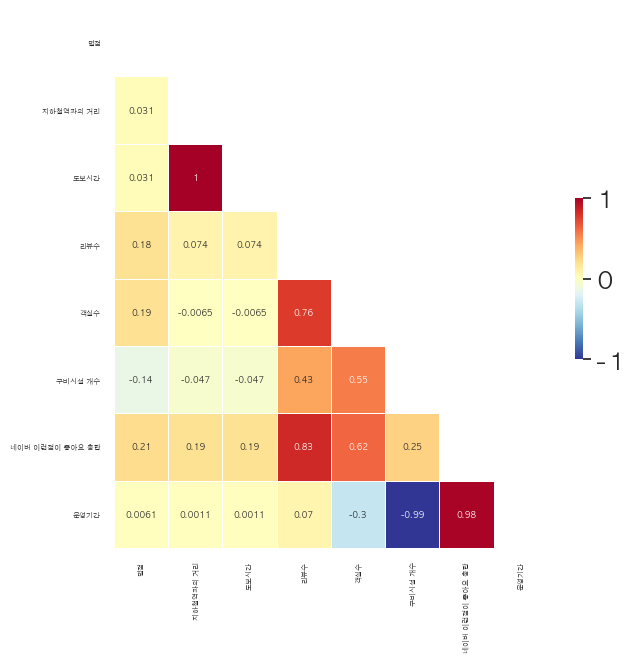

In [276]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(5)


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(cor_matrix, bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(cor_matrix, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .3},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1,   # 컬러바 범위 -1 ~ 1
            annot_kws={"size": 6}
           )  
#plt.show()


In [277]:
select_continuos2 = ['별점','리뷰수','객실수','네이버 이런점이 좋아요 총합']
sel_naver2 = naver_df[select_continuos2]

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color,

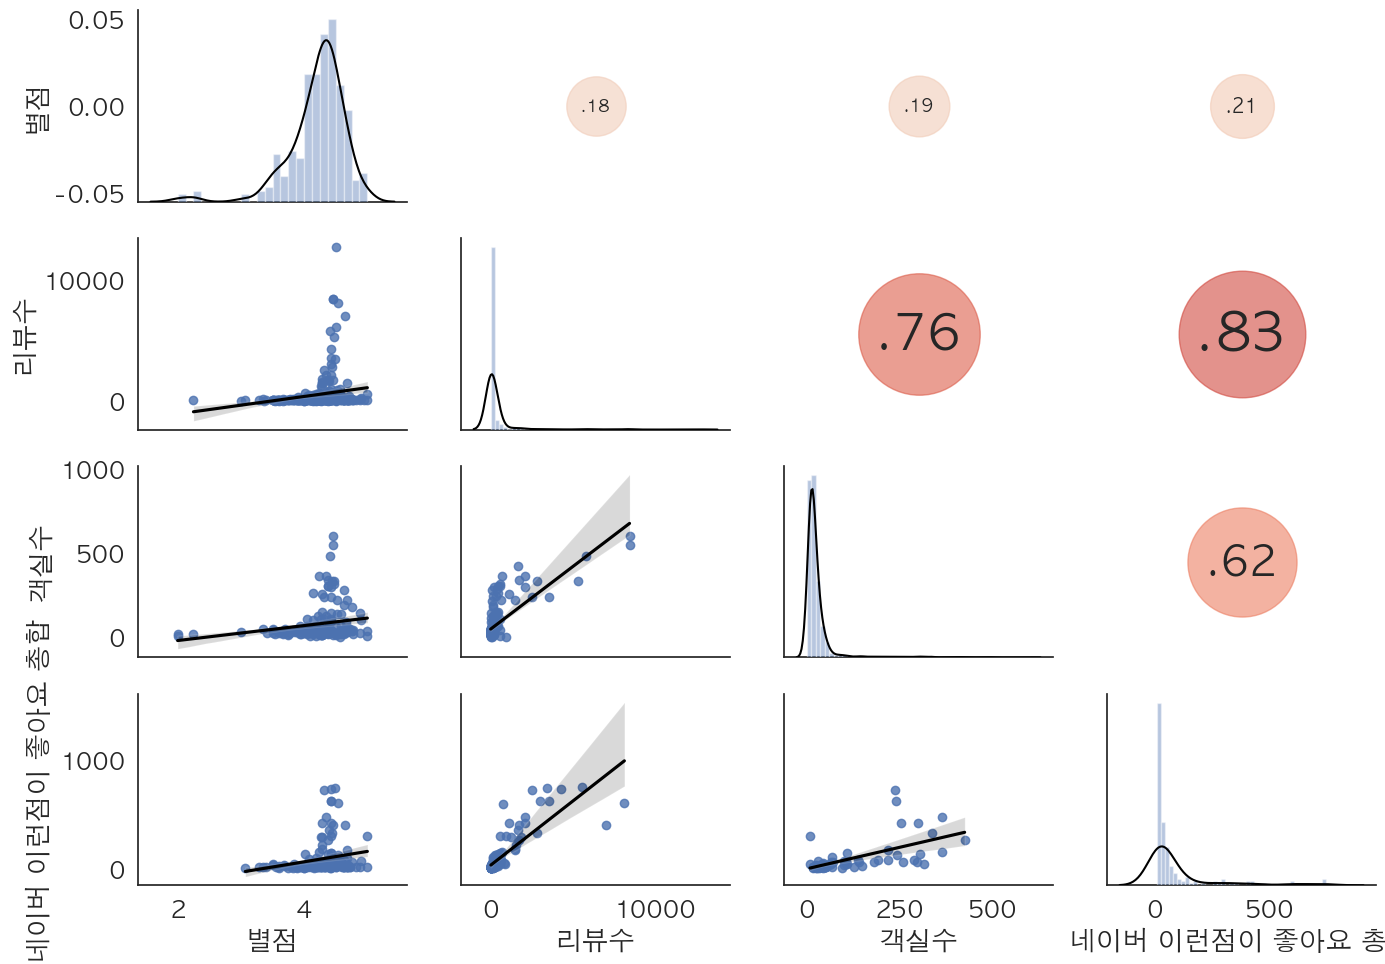

In [278]:
#fig, ax = plt.subplots( figsize=(7,7) )
sns.set(style='white', font_scale=1.6,
        font="AppleGothic", 
        rc={"axes.unicode_minus":False})
g = sns.PairGrid(sel_naver2, aspect=1.4, diag_sharey=False)
#g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
#ax.axhline(y=100)
g.map_lower(sns.regplot, line_kws={'color': 'black'})
g.map_diag(sns.distplot, kde_kws={'color': 'black'})
g.map_upper(corrdot)



/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/324892733.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel1.dropna(inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/324892733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel2.dropna(inplace=True)
/var/folders/wj/6fqsj4yn655_2rsnl7jt1yyh0000gn/T/ipykernel_2098/324892733.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel3.dro

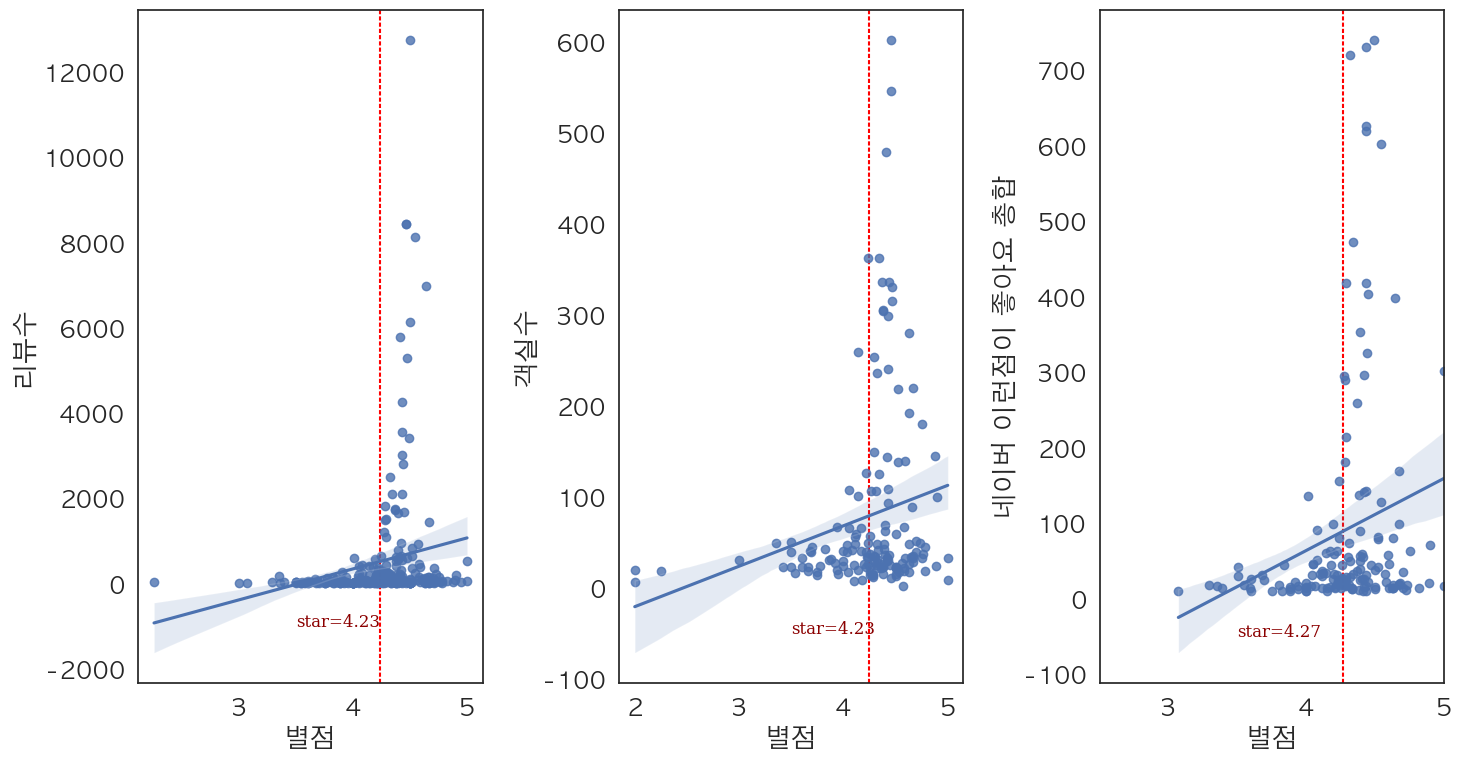

In [302]:
# 개별 scatter plot
fig, ax = plt.subplots(1, 3, figsize=(15, 8))


sel1 = sel_naver2[['리뷰수','별점']]
sel1.dropna(inplace=True)
sel2 = sel_naver2[['객실수','별점']]
sel2.dropna(inplace=True)
sel3 = sel_naver2[['네이버 이런점이 좋아요 총합','별점']]
sel3.dropna(inplace=True)

font1 = {'family': 'serif',
      'color':  'darkred',
      'weight': 'normal',
      'size': 12}


g1 = sns.regplot(x=sel1['별점'], y=sel1['리뷰수'], ax=ax[0])
ax[0].axvline(x=sel1['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[0].text(3.5, -1000, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g2 = sns.regplot(x=sel2['별점'], y=sel2['객실수'], ax=ax[1])
ax[1].axvline(x=sel2['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[1].text(3.5, -50, f'star={sel1["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

g3 = sns.regplot(x=sel3['별점'], y=sel3['네이버 이런점이 좋아요 총합'], ax=ax[2])
ax[2].axvline(x=sel3['별점'].mean(),color="red", dashes=(2, 1), zorder=0)
ax[2].text(3.5, -50, f'star={sel3["별점"].mean():.2f}', fontdict=font1)
plt.xlim(2.5,5)

fig.tight_layout()


In [ ]:
# 각 항목별 평균 별점 기준 평균 차이 구하기
